# Ta chia quy trình thành những phần sau:
- Tìm hiểu và làm sạch bộ dữ liệu.
- Chuẩn bị dữ liệu để xây dựng mô hình
- Thử xây dựng các mô hình khác nhau và lựa chọn mô hình tốt nhất - Điều chỉnh siêu tham số, đánh giá mô hình, v.v
- Dự đoán trên bộ dữ liệu test (test.csv)

In [46]:
# Nhập các thư viện cần thiết
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Nhập dữ liệu

In [47]:
#Nhập file và đọc 10 dòng đầu
numbers = pd.read_csv('train.csv')
numbers.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
numbers.shape

(42000, 785)

#### Khám phá dữ liệu

In [49]:
#Kiểm tra loại dữ liệu
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Tất cả các cột đều có kiểu dtype - int64

In [50]:
numbers.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [51]:
#Kiểm tra giá trị null
round(100*(numbers.isnull().sum()/(len(numbers.index))),2).sort_values(ascending = False)

label       0.0
pixel515    0.0
pixel517    0.0
pixel518    0.0
pixel519    0.0
pixel520    0.0
pixel521    0.0
pixel522    0.0
pixel523    0.0
pixel524    0.0
pixel525    0.0
pixel526    0.0
pixel527    0.0
pixel528    0.0
pixel529    0.0
pixel530    0.0
pixel531    0.0
pixel532    0.0
pixel533    0.0
pixel534    0.0
pixel535    0.0
pixel536    0.0
pixel537    0.0
pixel516    0.0
pixel514    0.0
pixel392    0.0
pixel513    0.0
pixel492    0.0
pixel493    0.0
pixel494    0.0
pixel495    0.0
pixel496    0.0
pixel497    0.0
pixel498    0.0
pixel499    0.0
pixel500    0.0
pixel501    0.0
pixel502    0.0
pixel503    0.0
pixel504    0.0
pixel505    0.0
pixel506    0.0
pixel507    0.0
pixel508    0.0
pixel509    0.0
pixel510    0.0
pixel511    0.0
pixel512    0.0
pixel538    0.0
pixel539    0.0
pixel540    0.0
pixel541    0.0
pixel566    0.0
pixel567    0.0
pixel568    0.0
pixel569    0.0
pixel570    0.0
pixel571    0.0
pixel572    0.0
pixel573    0.0
pixel574    0.0
pixel575    0.0
pixel576

Không có giá trị null.

#### Kiểm tra và hiển thị

In [52]:
# Kiểm tra các nhãn (các cột có giá trị duy nhất)
np.unique(numbers['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [53]:
# Kiểm tra số lượng mỗi nhãn
numbers['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

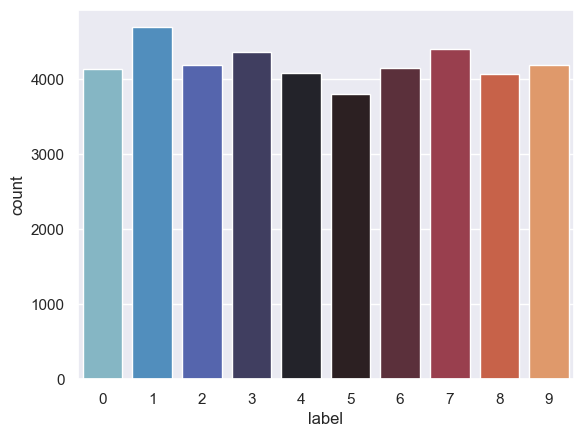

In [54]:
#Hiển thị sơ đồ cột số lượng các nhãn
sns.countplot(x=numbers['label'],palette = 'icefire')

#### Kiểm tra các `pixel`

Text(0, 0.5, 'Tần suất')

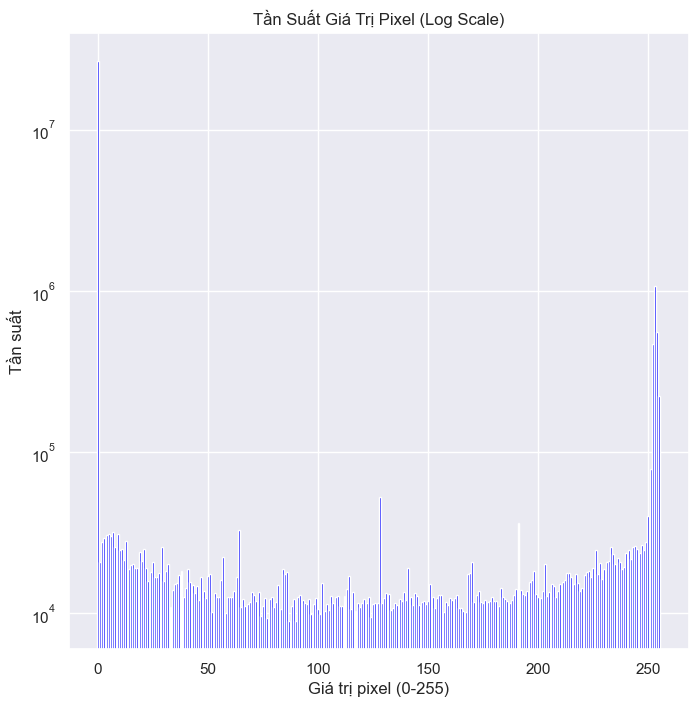

In [55]:
y = pd.value_counts(numbers.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Tần Suất Giá Trị Pixel (Log Scale)')
plt.yscale('log')
plt.xlabel('Giá trị pixel (0-255)')
plt.ylabel('Tần suất')

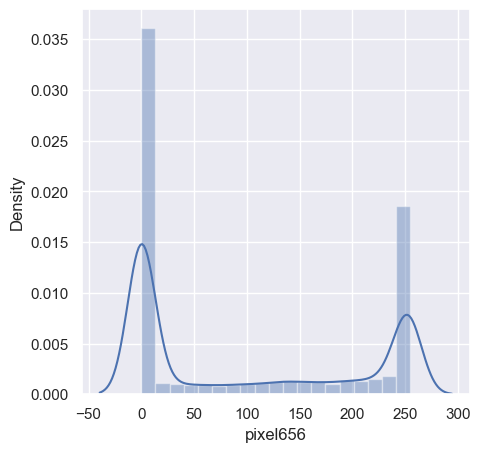

In [56]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['pixel656'])
plt.show()

<AxesSubplot: xlabel='pixel684', ylabel='Density'>

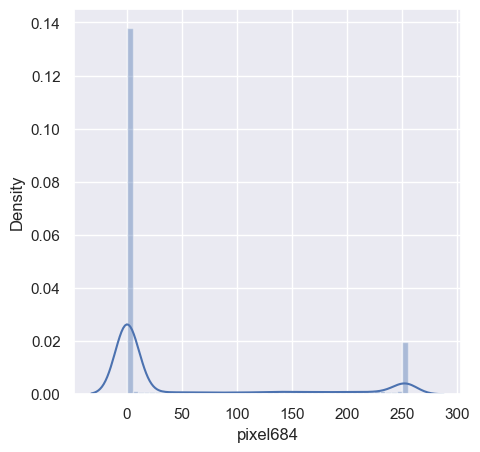

In [57]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['pixel684'])

#### `label` vs `pixel`

<AxesSubplot: xlabel='label', ylabel='pixel683'>

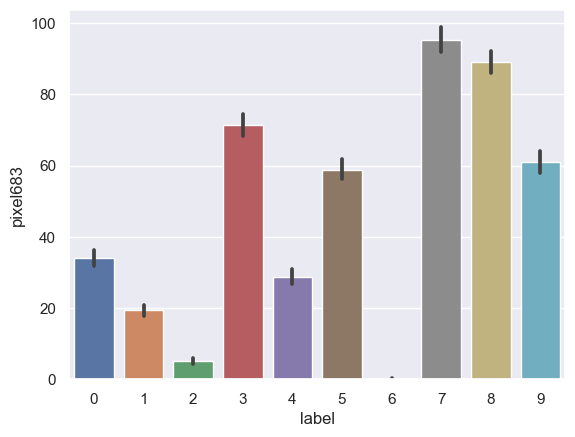

In [58]:
sns.barplot(x='label', y='pixel683', data=numbers)

<AxesSubplot: xlabel='label', ylabel='pixel572'>

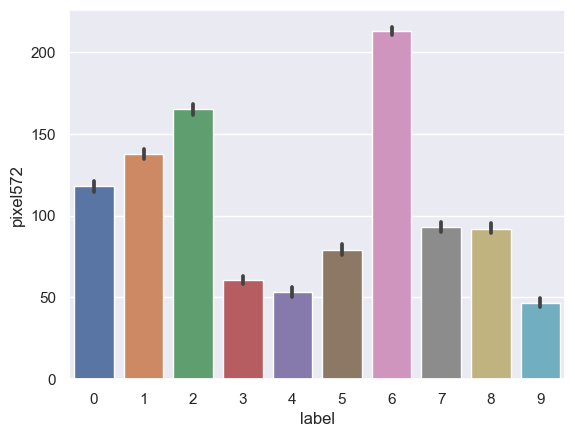

In [59]:
sns.barplot(x='label', y='pixel572', data=numbers)

#### Hiển thị một vài chữ số:

Text(0.5, 1.0, 'Số 1')

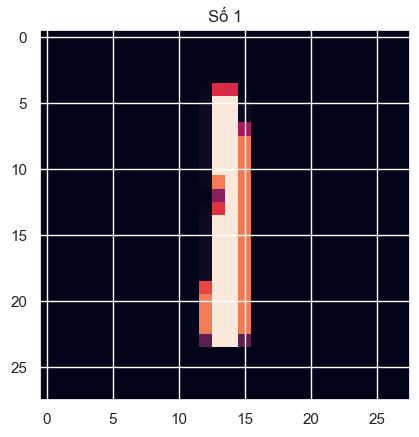

In [60]:
one = numbers.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Số 1")

Text(0.5, 1.0, 'Số 0')

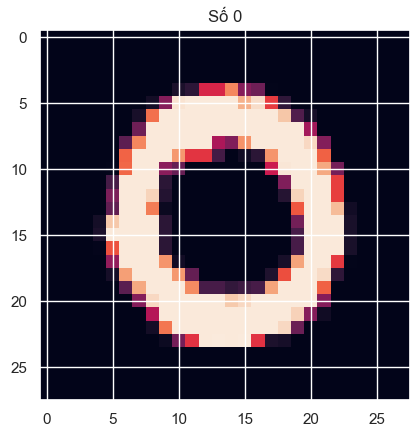

In [61]:
zero = numbers.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Số 0")

Text(0.5, 1.0, 'Số 9')

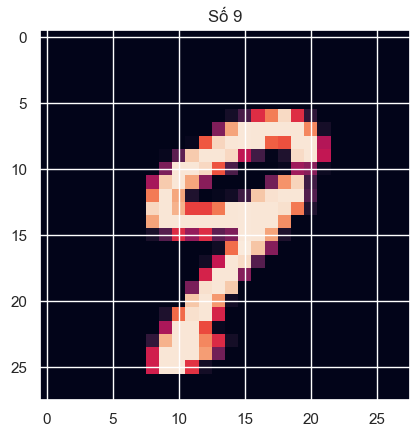

In [62]:
nine = numbers.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Số 9")

#### Kiểm tra bản đồ nhiệt

<AxesSubplot: >

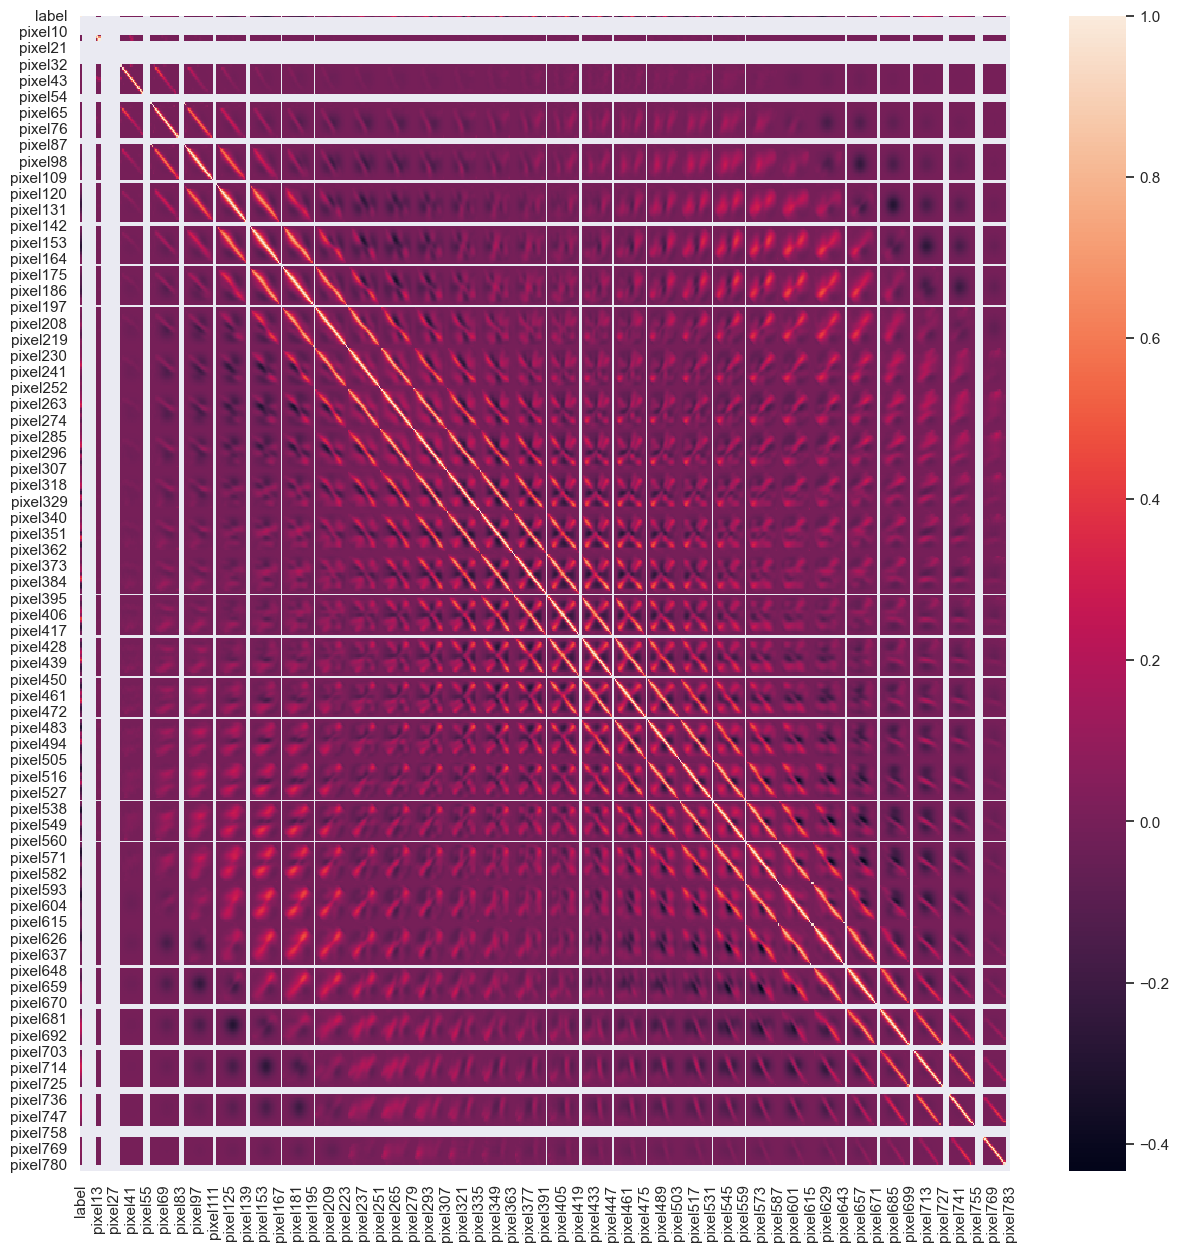

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(data=numbers.corr(),annot=False)

Hầu như tất cả các giá trị pixel đều tương quan. Đều này rất tốt trong việc lựa chọn mô hình để dùng, đặc biệt là SVM, bởi vì **SVM rất hiếm khi hoạt động tốt với dữ liệu không tương quan (không cân bằng)**.

#### Chuẩn bị dữ liệu

In [64]:
# Trung bình các giá trị đặc trưng
pd.set_option('display.max_rows', 999)
round(numbers.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

pixel407    139.83
pixel435    139.07
pixel408    137.42
pixel434    135.52
pixel211    135.49
pixel210    133.59
pixel602    132.98
pixel212    132.90
pixel436    132.00
pixel601    130.81
pixel380    130.66
pixel406    130.14
pixel409    128.65
pixel381    127.50
pixel463    127.45
pixel575    126.73
pixel603    126.34
pixel209    126.26
pixel629    126.03
pixel462    126.01
pixel213    126.00
pixel574    125.56
pixel183    124.89
pixel379    124.51
pixel237    123.89
pixel238    123.23
pixel433    123.10
pixel628    122.65
pixel600    122.59
pixel240    122.22
pixel239    121.98
pixel184    121.90
pixel630    121.89
pixel241    121.77
pixel437    121.70
pixel464    121.32
pixel236    120.60
pixel182    119.70
pixel576    119.67
pixel547    118.65
pixel353    118.46
pixel548    117.19
pixel573    116.96
pixel242    116.12
pixel491    115.44
pixel461    115.36
pixel405    114.96
pixel352    113.93
pixel627    113.00
pixel208    112.99
pixel214    112.65
pixel492    112.60
pixel519    

Ta thấy rằng trung bình giữa khoảng 140 đến 0. Tốt hơn là nên scale chúng

In [65]:
# Chia thành x và y
X = numbers.drop("label", axis = 1)
y = numbers['label']

In [66]:
# Scale các đặc trưng
X_scaled = scale(X)

# Dùng 20% dữ liệu để huấn luyện vì bộ dữ liệu rất lớn
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, test_size = 0.8, random_state = 101)

In [67]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8400, 784)
y_train shape: (8400,)
X_test shape: (33600, 784)
y_test shape: (33600,)


#### Xây dựng mô hình

1. Đầu tiên ta thử Mô hình `Tuyến tính` (linear):

In [68]:
# mô hình tuyến tính
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# dự đoán
y_pred = model_linear.predict(X_test)

In [69]:
# Ma trận nhầm lẫn và độ chính xác accuracy, độ chính xác precision, recall

# Độ chính xác (accuracy)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Ma trận nhầm lẫn
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


In [70]:
#Độ chính xác precision, recall và f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3285
           1       0.95      0.98      0.97      3760
           2       0.90      0.91      0.90      3343
           3       0.89      0.88      0.88      3475
           4       0.88      0.93      0.91      3290
           5       0.87      0.86      0.87      3039
           6       0.95      0.95      0.95      3277
           7       0.92      0.92      0.92      3504
           8       0.91      0.87      0.89      3272
           9       0.90      0.86      0.88      3355

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



Mô hình tuyến tính cho xấp xỉ 91% độ chính xác. Giờ ta thử mô hình phi tuyến tính với siêu tham số ngẫu nhiên.

Thử những mô hình `phi tuyến tính`:

2. Hàm nhân `Poly` 

In [71]:
# Mô hình phi tuyến
# Sử dụng hàm nhân poly, C=1, giá trị gamma mặc định

# Mô hình
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# dự đoán
y_pred = non_linear_model_poly.predict(X_test)

In [72]:

# Độ chính xác accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Ma trận nhầm lẫn
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8822619047619048 

[[2927    0    9    3   43   11   27    0  262    3]
 [   1 3681   11    2   12    0    6    0   45    2]
 [  15   18 2562   31  152    2   10   23  520   10]
 [   0   16   23 2921   28   40    3   15  387   42]
 [   3    8   14    0 3110    8    4    5   13  125]
 [   6    1    5   68   76 2429   29    7  377   41]
 [  17    8    9    0  101   45 2943    2  152    0]
 [   1   34    8    8  155    1    0 2918   77  302]
 [   3   16    7   29   25   39    3    5 3128   17]
 [   5   11    1   17  166    8    0   41   81 3025]]


Độ chính xác rơi vào khoảng 88%, tiếp tục thử với `rbf`.

3. Hàm nhân `rbf`

In [73]:
# Mô hình phi tuyến
# Sử dụng hàm nhân kbf, C=1, giá trị gamma mặc định

# Mô hình
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# Dự đoán
y_pred = non_linear_model.predict(X_test)

In [74]:
# Độ chính xác accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Ma trận nhầm lẫn
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396130952380952 

[[3195    0   22    6    4    9   32    4   13    0]
 [   0 3690   23   13    7    2    7    6    8    4]
 [  15   14 3146   31   31    5   18   37   41    5]
 [   3    8   96 3192    5   72    6   30   43   20]
 [   3    7   57    1 3095   10   20   24    6   67]
 [  15    9   40   66   15 2780   50   15   31   18]
 [  18    5   48    1   11   31 3149    2   12    0]
 [   6   21   72   11   23    3    0 3284    3   81]
 [  13   24   42   63   14   63   22   19 2994   18]
 [  12   10   42   39   80    6    0   96   24 3046]]


In [75]:
#Độ chính xác precision, recall và f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3285
           1       0.97      0.98      0.98      3760
           2       0.88      0.94      0.91      3343
           3       0.93      0.92      0.93      3475
           4       0.94      0.94      0.94      3290
           5       0.93      0.91      0.92      3039
           6       0.95      0.96      0.96      3277
           7       0.93      0.94      0.94      3504
           8       0.94      0.92      0.93      3272
           9       0.93      0.91      0.92      3355

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



Như ta đã thấy rằng mô hình phi tuyến `rbf` cho xấp xỉ 94% độ chính xác accuracy. Và hầu hết độ chính xác precision là trên 90%. Vậy ta sẽ  chọn siêu tham số tương ứng với những mô hình `rbf`.

#### GridSearch - Điều chỉnh siêu tham số

In [76]:
# Tạo một đối tượng KFold chia ra 5 phần 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Chỉ định khoảng siêu tham số
# Thiết lập các siêu tham số bằng cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100]}]


# Mô hình chỉ định
model = SVC(kernel="rbf")

# Thiết lập GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)      

# fit mô hình
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [77]:
# Kết quả cv
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,453.387487,32.996404,64.741846,5.918356,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,9,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,114.406637,10.316959,38.498684,5.330283,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,3,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,175.930835,3.599934,45.788614,4.426085,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,6,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,433.920547,36.422678,56.071737,12.454098,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,101.347439,5.653584,32.164929,2.505782,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,73.517138,3.158263,30.398534,2.416196,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,4,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,403.002014,24.981795,18.592628,1.022624,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,97.623801,5.347776,32.978697,5.309463,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,52.863526,11.015665,21.965733,3.305842,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,5,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645


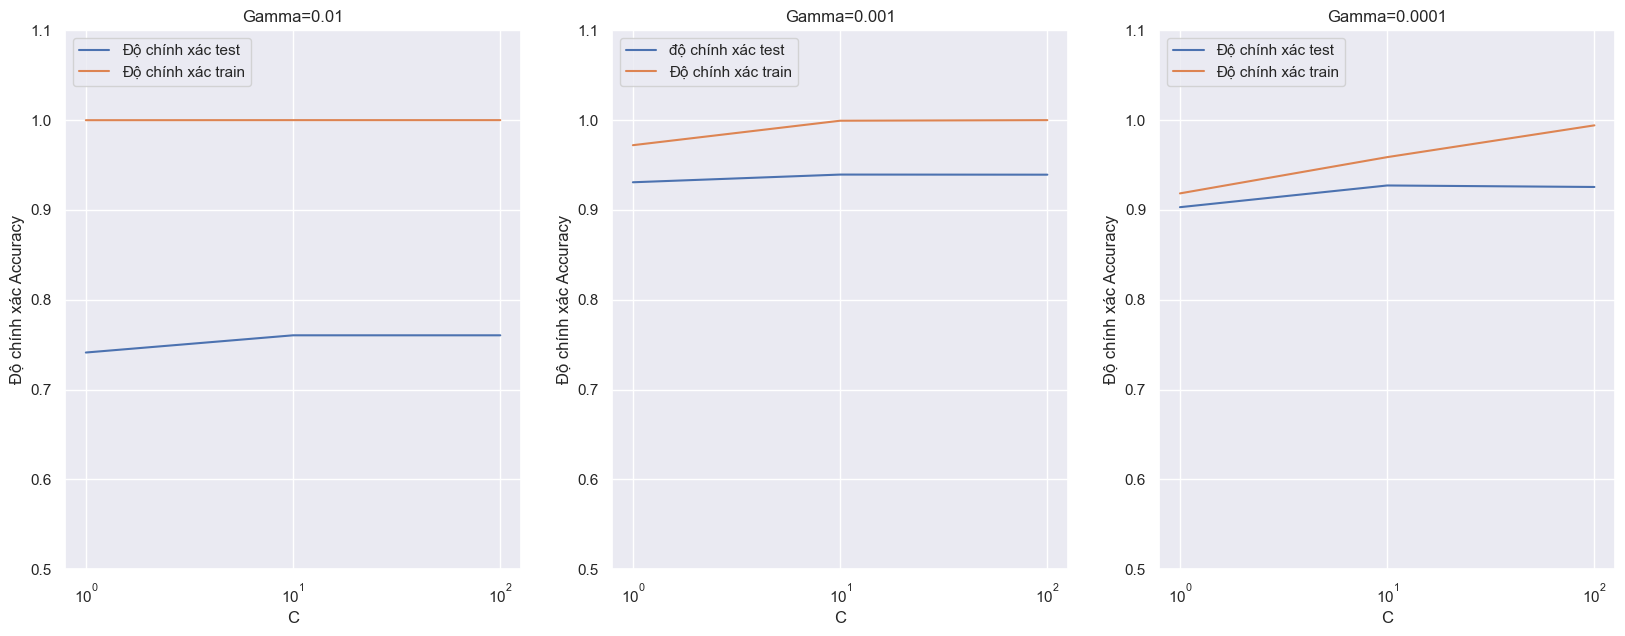

In [78]:
# Chuyển đổi C thành kiểu số cho việc vẽ plot trên trục x
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # Vẽ plot
plt.figure(figsize=(20,7))

# Plot con 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Độ chính xác Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['Độ chính xác test', 'Độ chính xác train'], loc='upper left')
plt.xscale('log')

# Plot con 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Độ chính xác Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['độ chính xác test', 'Độ chính xác train'], loc='upper left')
plt.xscale('log')


# Plot con 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Độ chính xác Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['Độ chính xác test', 'Độ chính xác train'], loc='upper left')
plt.xscale('log')

In [79]:
# In điểm chính xác accuracy tối ưu và các siêu tham số
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("Điểm test tốt nhất là {0} tương ứng với các siêu tham số {1}".format(best_score, best_hyperparams))

Điểm test tốt nhất là 0.9394047619047619 tương ứng với các siêu tham số {'C': 10, 'gamma': 0.001}


Ta lấy giá trị tốt nhất ({'C': 10, 'gamma': 0.001}) và các giá trị này cũng được đề xuất bởi sklearn.

#### Xây dựng và Đánh giá mô hình cuối.

In [80]:
# Mô hình với các siêu tham số tối ưu

# Mô hình
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Các metric
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



In [81]:
# Độ chính xác class-wise khác nhau - #Độ chính xác precision, recall và f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.90      0.95      0.92      3343
           3       0.95      0.93      0.94      3475
           4       0.94      0.95      0.94      3290
           5       0.94      0.93      0.93      3039
           6       0.96      0.97      0.96      3277
           7       0.94      0.95      0.94      3504
           8       0.96      0.93      0.94      3272
           9       0.95      0.92      0.93      3355

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



Ta thấy rắt với siêu tham số C = 10 và gamma = 0.001, ta thấy được độ chính xác accuracy tổng quan của mô hình là khoảng 95% và độ chính xác precision cho mỗi nhãn cũng trên 94%.

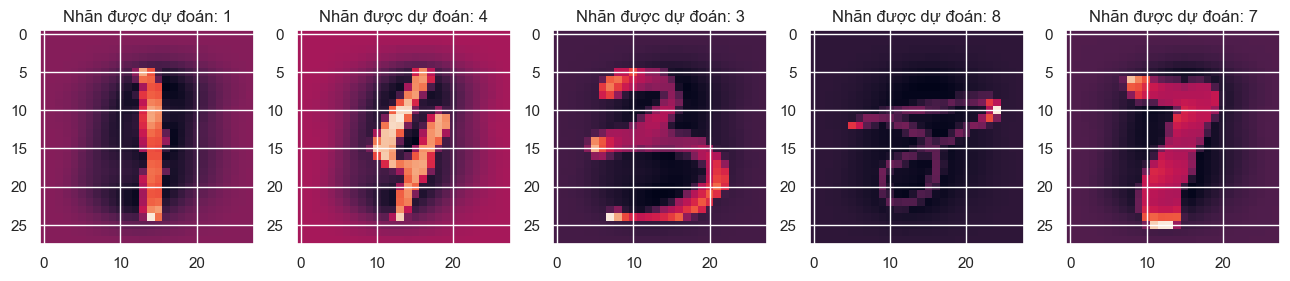

In [82]:
# Ta hiển thị mô hình cuối trên bộ dữ liệu huấn luyện.

df = np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = X_test[j].reshape(28,28)
    plt.title(f'Nhãn được dự đoán: {y_pred[j]}')
    plt.imshow(d)
plt.show()

#### Ta sử dụng mô hình cuối trên dữ liệu test (test.csv)

In [83]:
#Nhập file và đọc một vài dòng
test_df = pd.read_csv('test.csv')
test_df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test_df.shape

(28000, 784)

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [86]:
# Scale các đặc trưng
test_scaled = scale(test_df)

In [87]:
#Dùng mô hình để dự đoán
test_predict = model.predict(test_scaled)

<AxesSubplot: xlabel='Label', ylabel='count'>

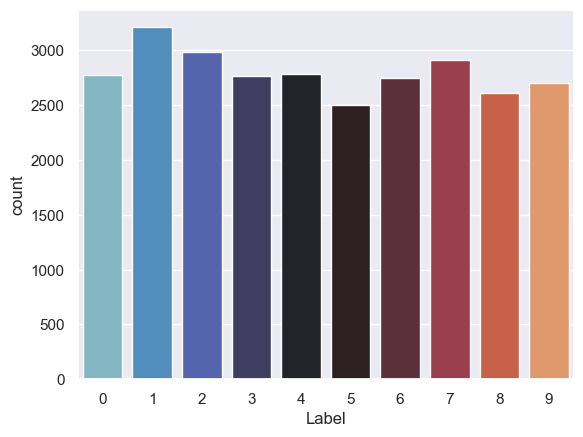

In [88]:
# Vẽ plot bản phân phối cho việc dự đoán
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(x=data_to_export['Label'], palette = 'icefire')

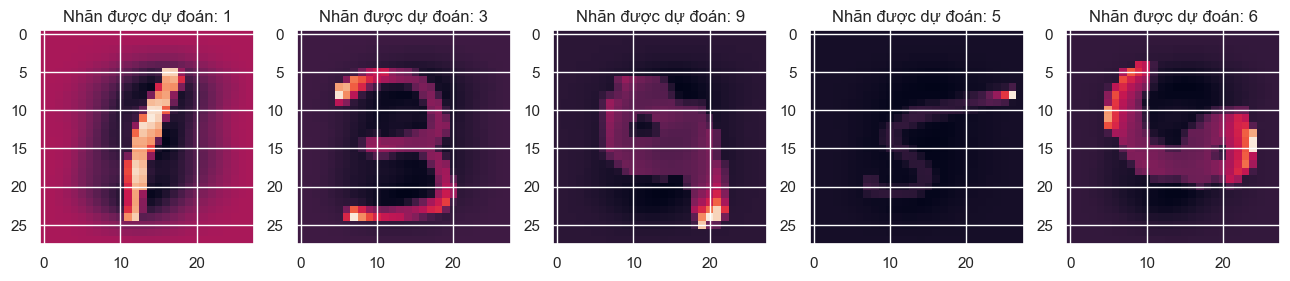

In [89]:
# Ta hiển thị một vài nhãn test được dự đoán

df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Nhãn được dự đoán: {test_predict[j]}')
    plt.imshow(d)
plt.show()

In [90]:
# Xuất các giá trị dự đoán được ra file csv 
data_to_export.to_csv(path_or_buf='submission.csv', index=False)